In [13]:
# Import the library
from tensorflow.keras.layers import Input
import tensorflow as tf
from tensorflow.python.keras.utils.vis_utils import plot_model
import pydot
from tensorflow.keras.models import Model

## Sequential API

In [14]:
def build_model_with_sequential():
    
    seq_model = tf.keras.models.Sequential(
        [ tf.keras.layers.Flatten(input_shape=(28,28)),
          tf.keras.layers.Dense(128, activation=tf.nn.relu),
          tf.keras.layers.Dense(10,activation=tf.nn.softmax)
        ])
    return seq_model

## Functional API

In [15]:
def build_model_with_functional():
    
    input_layer = tf.keras.Input(shape=(28,28))
    flatten_layer = tf.keras.layers.Flatten()(input_layer)
    first_dense = tf.keras.layers.Dense(128, activation=tf.nn.relu)(flatten_layer)
    output_layer = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(first_dense)
    
    func_model = Model(inputs = input_layer, outputs = output_layer) # model constructor
    
    return func_model

In [16]:
model = build_model_with_functional() 

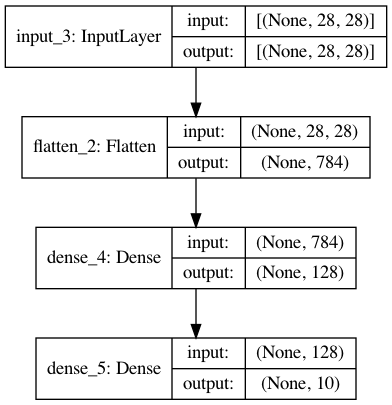

In [17]:
plot_model(model, show_shapes = True, show_layer_names = True, to_file = 'model.png')

## Training the model

In [18]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels),(test_images, test_labels) = mnist.load_data()
training_images = training_images/255.0
test_images = test_images/255.0

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(training_images, training_labels, epochs =5)
model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6283 - accuracy: 0.7797
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3875 - accuracy: 0.8598
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3402 - accuracy: 0.8751
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3067 - accuracy: 0.8873
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.3425 - accuracy: 0.8745


[0.3425287902355194, 0.8744999766349792]